# DESAFIO 0.

### A partir das bibliotecas a seguir, resolver as questões propostas.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Exercício 1:  Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [ ]:
dados = pd.read_csv('auto_industry.csv')

In [ ]:
print(f'Instâncias: {dados.shape[0]}')
print(f'Variáveis: {dados.shape[1]}')

Instâncias: 398
Variáveis: 9


Olhando, de forma aleatória, 5 instâncias do dataset pra visualizar suas colunas e valores

In [ ]:
dados.sample(5, random_state= 1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
174,18.0,6,171.0,97.0,2984,14.5,75,usa,ford pinto
359,28.1,4,141.0,80.0,3230,20.4,81,europe,peugeot 505s turbo diesel
250,19.4,8,318.0,140.0,3735,13.2,78,usa,dodge diplomat
274,20.3,5,131.0,103.0,2830,15.9,78,europe,audi 5000
283,20.2,6,232.0,90.0,3265,18.2,79,usa,amc concord dl 6


Olhando os tipos de dados em cada coluna, quantas instâncias há em cada uma e, por consequência, se há valores faltantes.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### Significado das colunas após exploração do dataset

[`mpg:`](https://www.carwow.co.uk/guides/running/what-is-mpg-0255#:~:text=Mpg%20stands%20for%20miles%20per,litres) Quantas milhas o carro faz por galão (4.55 litros cada galão).

[`cylinders:`](https://www.arnoldclark.com/newsroom/2331-everything-you-need-to-know-about-engine-cylinders) Os cilindros do carro. Quanto mais alto, mais potente o carro, porém mais [combustível é gasto ](https://www.whichcar.com.au/car-advice/what-is-engine-size-and-why-does-it-matter) também.

[`displacement:`](https://www.yourmechanic.com/article/what-is-engine-displacement) Quanto mais alto mais potente o carro, porém mais combustível é gasto pra manter seu funcionamento.

[`horsepower:`](https://en.wikipedia.org/wiki/Horsepower) Quantos cavalos tem o carro.

`weight:` O peso do carro.

`acceleration:` Capacidade de aceleração do carro.

`model_year:` Ano do modelo do carro.

`	origin:` País de origem.

`name:` Nome do carro.

#### Questões iniciais

Análise descritiva inicial

In [ ]:
dados.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Olhando para a função [`.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) que nos dá algumas medidas estatísticas do conjunto de dados passado como parâmetro podemos perceber algumas indicações iniciais sobre a dispersão dos dados.

De acordo com o desvio padrão, as variáveis `mpg`(pela sua natureza), `displacement`, `horsepower` e `weight` são as que demonstram os dados mais dispersos, isto é, indivíduos mais distantes das respectivas medias.

Enquanto para as variáveis `cylinders` e `aceleration` temos desvios menores e dados menos dispersos. Pela sua natureza as duas também possuem um intervalo de valores menor que as variáveis supracitadas

Os anos do modelo dos carros do dataset, por sua vez, estão concentrados no intervalo de 1973 e 1979. Em todo o dataset temos modelos que vão de 1970 até 1982.

O conjunto de dados tem carros de quais origens e quantos carros há de cda uma dessas origens?

In [ ]:
dados['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

#### Exercício 2:  Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

Utilizarei o método [`.isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) junto ao `.sum()` que me retornam a quantidade de valores faltantes (se houver) para cada coluna do dataset em que são aplicados.

In [ ]:
dados.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Existem valores faltantes na variável referente aos cavalos do carro. Como a variável pode ser importante pra perceber correlações entre as variáveis e possíveis projetos de predição, vamos optar por substituir tais valores e não eliminar esses indivíduos do dataset.

Como está a distribuição dos valores de horsepower?

In [ ]:
dados['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

Como os dados estão bem dispersos vamos substituir tais valores pela mediana de `horsepower`

In [ ]:
# Calculando a mediana da coluna horsepower
mediana_horsepower = dados['horsepower'].median()
print(mediana_horsepower)

93.5


In [ ]:
# Substituindo os valores NaN em horsepower pela sua mediana
dados['horsepower'] = dados['horsepower'].fillna(mediana_horsepower)

In [ ]:
# Conferindo se os valores nulos foram substituídos
dados.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

#### Exercício 3: Explore a função [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) para criar um subconjunto dos dados e analisar apenas as entradas referentes à `'origin' = usa`.

In [ ]:
usa = dados.groupby("origin").get_group('usa')

In [ ]:
dados.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
usa.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,20.083534,6.248996,245.901606,118.638554,3361.931727,15.033735,75.610442
std,6.402892,1.661425,98.501839,39.705390,794.792506,2.751112,3.677094
min,9.000000,4.000000,85.000000,52.000000,1800.000000,8.000000,70.000000
25%,15.000000,4.000000,151.000000,88.000000,2720.000000,13.000000,73.000000
50%,18.500000,6.000000,250.000000,105.000000,3365.000000,15.000000,76.000000
75%,24.000000,8.000000,318.000000,150.000000,4054.000000,16.900000,79.000000
max,39.000000,8.000000,455.000000,230.000000,5140.000000,22.200000,82.000000


Ao olhar o desvio padrão das variáveis para o dataset com informações de carros só dos EUA, a distribuição dos seus dados está bem próximo a do dataset original com os carros de Europa e Japão.

#### Exercício 4: Remova os elementos duplicados e crie uma tabela de consumo em (Km/L) e altere os nomes dos países de orígem para que todos comecem com letras maiúsculas.

In [ ]:
# Removendo valores duplicados
dados.drop_duplicates(inplace= True)

In [ ]:
# Criando um novo Dataframe vazio
df = pd.DataFrame()

[`Fórmula conversão de MPG para KM/L`](https://www.asknumbers.com/mpg-to-kml.aspx)

In [ ]:
# Vamos passar as milhas por galão para KM/l e inserir no dataframe criado
df['KM/L'] =  round(dados['mpg'] / 2.35, 2)
df.head()

,KM/L
0,7.66
1,6.38
2,7.66
3,6.81
4,7.23


In [ ]:
# Inserindo nome dos locais de origem dos carros no dataframe criado
df['origem'] = dados['origin'].str.capitalize()
df.head()

,KM/L,origem
0,7.66,Usa
1,6.38,Usa
2,7.66,Usa
3,6.81,Usa
4,7.23,Usa


#### Exercício 5:  Imprima a matriz de correlação do dataframe e avalie as relações entre os atributos.

In [ ]:
# Verificando a correlação entre as variáveis
correlacao = dados.corr()
correlacao

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


[`Matriz de correlação`](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

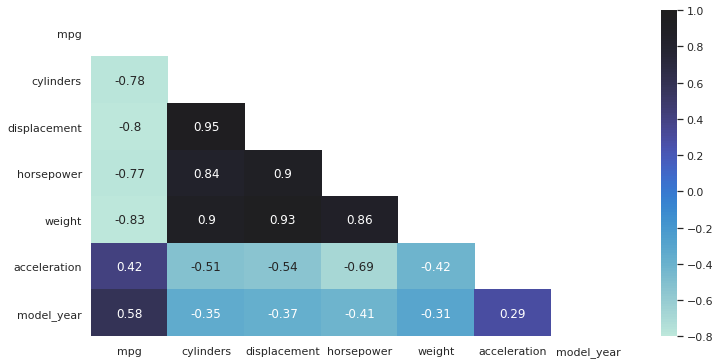

In [ ]:
# Delimitando tamanho da figura da matriz de correlação
plt.figure(figsize=(12, 6))

# Criando uma máscara pra cortar a correlação das variáveis com elas mesmas
mask= np.triu(np.ones_like(correlacao))

# Criando matriz de correlação
sns.heatmap(correlacao, vmin= -0.8, vmax= 1.0, center= True, annot= True, mask= mask)

[`CORRELAÇÕES`](https://en.wikipedia.org/wiki/Correlation_and_dependence)

`CORRELAÇÕES POSITIVAS`:

Como a variável displacement diz respeito à medida dos cilindros que compõem o carro, faz sentido que elas (displacement e cylinders) possuam correlação positiva, isto é, quando o valor de uma sobe a outra também e o mesmo vale para o movimento contrário. Nesse sentido, o peso do carro também sobe quando displacement e cylinders sobem.

O valor da variável horsepower também possui forte correlação positiva com as variáveis displacement e cylinders. O que faz sentido tendo em vista que ela
é uma medida para a potência do carro.

`CORRELAÇÕES NEGATIVAS`:

A variável `mpg` demonstra forte correlação negativa com `displacement`, o que faz sentido já que ela é quantas milhas o carro faz por galão. Nesse sentido, quanto maior o volume de cilindros do carro, maior será a necessidade de combustível para o manter e, portanto, menor será a distância possível de percorrer por galão. 
O que parece também levar à correlação negativa entre `mpg` e `weight` do carro, já que carros com maior volume dos cilindros serão mais pesados.

Em termos de causalidade, a primeira correlação faz mais sentido.

#### Exercício 6: Gere gráficos de [`boxplots `](https://seaborn.pydata.org/generated/seaborn.boxplot.html) para todos os elementos numéricos do dataframe.

In [ ]:
# Inserindo grades nos boxplots que ajudam na visualização da distribuição dos valores
sns.set_theme(style="whitegrid")

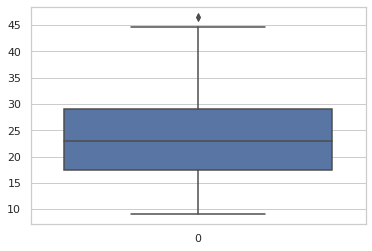

In [ ]:
# MPG
sns.boxplot(data= dados['mpg'])

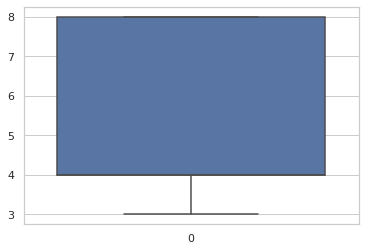

In [ ]:
# cylinders
sns.boxplot(data= dados['cylinders'])

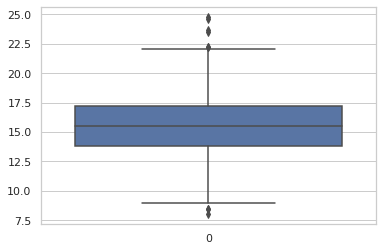

In [ ]:
# aceleration
sns.boxplot(data= dados['acceleration'])

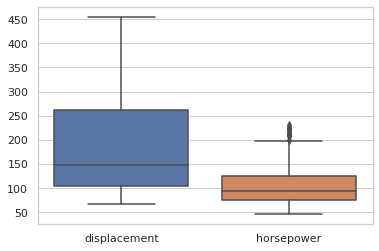

In [ ]:
# Distribuição dos valores de `displacement` e `horsepower`
sns.boxplot(data= dados[['displacement', 'horsepower']])

Distribuição dos valores de `weight`

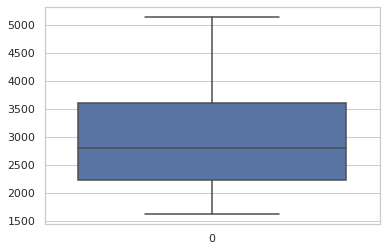

In [ ]:
sns.boxplot(data= dados['weight'])

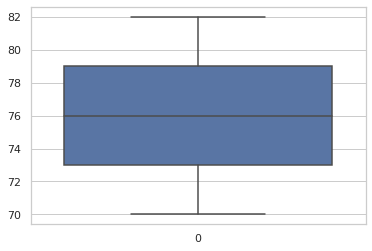

In [ ]:
# Distribuição dos valores de model year
sns.boxplot(data= dados['model_year'])

#### Exercicio 7: Eliminando os elementos `'origin'`, `'name'`, `'model_year'`, calcule a matriz de correlação entre atributos remanecentes, incluindo apenas aquelas correlações que em módulo superam o corte de `0.8`, discuta tambem suas relações de proporcionalidade.

In [ ]:
# Gerando correlação
variaveis_analise = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
corr = dados[variaveis_analise].corr()

In [ ]:
# Selecionando somente valores em módulo maiores que 0.8 

#corr_condicoes = corr[(corr <= -0.8) | (corr >= 0.8)]
corr_condicoes = corr[abs(corr) >= 0.8]

corr_condicoes

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,NaN,-0.804203,NaN,-0.831741,NaN
cylinders,NaN,1.000000,0.950721,0.842983,0.896017,NaN
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,NaN
horsepower,NaN,0.842983,0.897257,1.000000,0.864538,NaN
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,NaN
acceleration,NaN,NaN,NaN,NaN,NaN,1.0


#### Calculando o pairplot das relações remanecentes.

A variável acceleration foi a única que não demonstrou correlação de ao menos 0.8 em módulo com nenhuma outra variável.

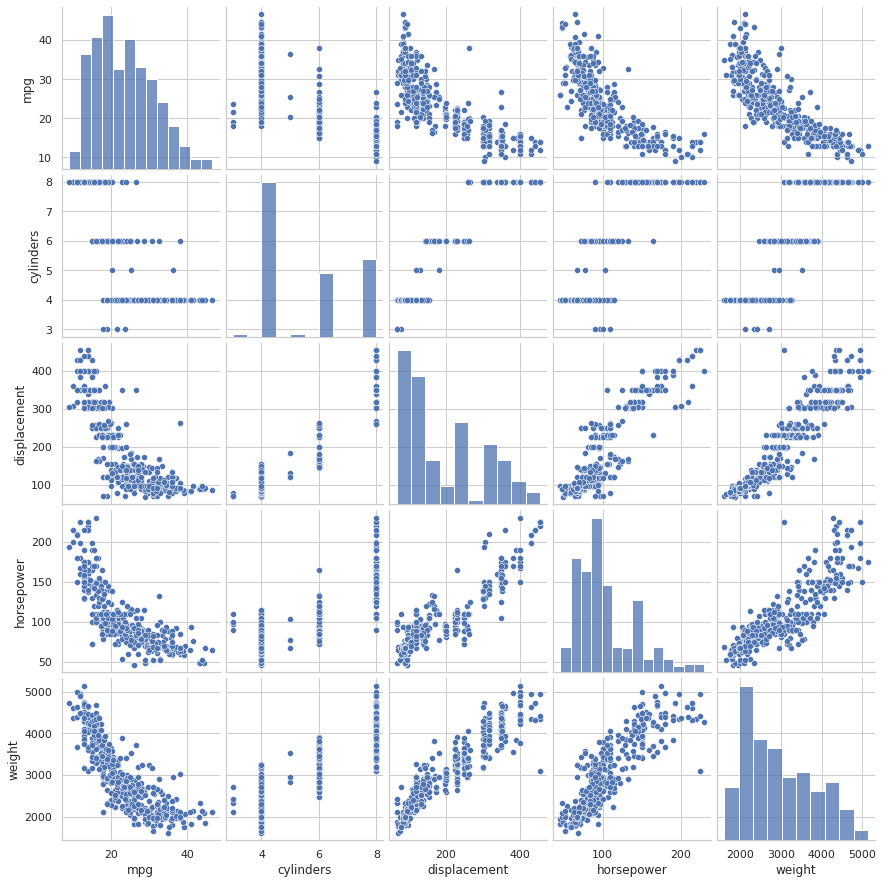

In [ ]:
variaveis_remanescentes = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']
sns.pairplot(data= dados[variaveis_remanescentes])

#### Calculando agora a matriz de correlação entre os elementos cujas correlações superam o corte proposto.

In [ ]:
# Correlação das variáveis remanescentes
# corr_condicoes

In [ ]:
# Criando uma máscara pra cortar a correlação das variáveis com elas mesmas
mask= np.triu(np.ones_like(corr_condicoes))

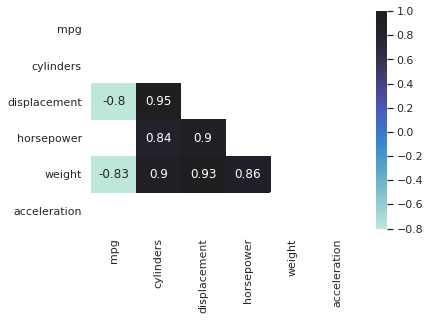

In [ ]:
# Matriz de correlação das variáveis remanescentes
sns.heatmap(corr_condicoes, vmin= -0.8, vmax= 1.0, mask= mask, center= True, annot= True)

#### Exercicio 8: Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. 

In [ ]:
pd.pivot_table(dados, values= 'mpg', index= ['model_year'],
                    columns=['cylinders'], aggfunc=np.mean)

cylinders,3,4,5,6,8
model_year,,,,,
70,NaN,25.285714,NaN,20.500000,14.111111
71,NaN,27.461538,NaN,18.000000,13.428571
72,19.0,23.428571,NaN,NaN,13.615385
73,18.0,22.727273,NaN,19.000000,13.200000
74,NaN,27.800000,NaN,17.857143,14.200000
75,NaN,25.250000,NaN,17.583333,15.666667
76,NaN,26.766667,NaN,20.000000,14.666667
77,21.5,29.107143,NaN,19.500000,16.000000
78,NaN,29.576471,20.3,19.066667,19.050000


#### Exercício 9: Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

In [ ]:
pd.pivot_table(dados, values= 'horsepower', index= ['cylinders'],
                    columns=['origin'], aggfunc=np.mean)

origin,europe,japan,usa
cylinders,,,
3,NaN,99.250000,NaN
4,78.793651,75.579710,81.479167
5,82.333333,NaN,NaN
6,113.500000,115.833333,99.587838
8,NaN,NaN,158.300971


#### Exercício 10: Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

In [ ]:
# Lista com valores intervalares dos anos do modelo (do menor até o maior pulando de dois em dois)
lista = list(range(dados['model_year'].min(), dados['model_year'].max() + 1, 2))
lista

[70, 72, 74, 76, 78, 80, 82]

Criando Series com os intervalos dos anos dos modelos com o método
[`pd.cut()`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)

In [ ]:
ano_modelo_intervalos = pd.cut(dados['model_year'], bins= lista)

#Quantos carros há em cada intervalo?
ano_modelo_intervalos.value_counts()

(72, 74]    67
(76, 78]    64
(74, 76]    64
(80, 82]    60
(78, 80]    58
(70, 72]    56
Name: model_year, dtype: int64

In [ ]:
#Pivot table com as condições especificadas acima
pd.pivot_table(dados, values= 'mpg', index= [ano_modelo_intervalos, 'cylinders'],
                    columns=['origin'], aggfunc=np.mean)

origin                   europe      japan        usa
model_year cylinders                                 
(70, 72]   3                NaN  19.000000        NaN
           4          25.000000  27.500000  24.000000
           6                NaN        NaN  18.000000
           8                NaN        NaN  13.550000
(72, 74]   3                NaN  18.000000        NaN
           4          25.384615  27.250000  23.800000
           6                NaN  20.000000  18.357143
           8                NaN        NaN  13.400000
(74, 76]   4          24.961538  29.000000  25.285714
           6          16.500000  19.000000  18.775000
           8                NaN        NaN  15.066667
(76, 78]   3                NaN  21.500000        NaN
           4          30.457143  29.875000  28.216667
           5          20.300000        NaN        NaN
           6          16.600000  22.000000  19.364286
           8                NaN        NaN  17.307143
(78, 80]   3                NaN  23.700000        NaN
           4          35.963636  36.130769  29.100000
           5          30.900000        NaN        NaN
           6                NaN  32.700000  22.400000
           8                NaN        NaN  18.630000
(80, 82]   4          35.120000  34.731579  30.064000
           6          30.700000  24.800000  24.100000
           8                NaN        NaN  26.600000

Enquanto Japão e Europa permanecem sem carros com 8 cilindros (na amostra), os EUA já possuem carros com tal quantidade de cilindros desde os anos 1970. Relacionado a isso, somente a partir dos anos 1980 os norte americanos passam a ter carros com 3 cilindros de acordo com a amostra e a media dos carros com 8 cilindros vão aumentando ao longo dos anos. O que pode indicar diferenças e movimentos culturais importantes entre USA, Japão e Europa (variável problemática por representar continente em comparação com outros dois países).


#### Exercício 11: Crie uma nova coluna com a relação peso/potência para cada veículo e plote um gráfico de dispersão dessa coluna com a de consumo que você criou no exercício 4

In [ ]:
df['peso/potencia'] = dados['weight'] / dados['horsepower']
df.head()

,KM/L,origem,peso/potencia
0,7.66,Usa,26.953846
1,6.38,Usa,22.381818
2,7.66,Usa,22.906667
3,6.81,Usa,22.886667
4,7.23,Usa,24.635714


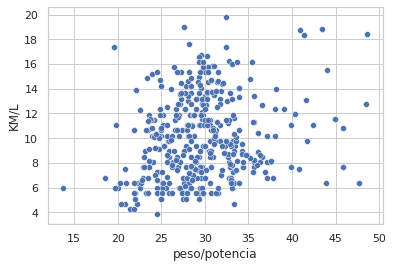

In [ ]:
# Gerando gráfico de dispersão
sns.scatterplot(x='peso/potencia', y='KM/L', 
                    data=df)